In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas
import math
import sys
import os

sys.path.insert(0, os.getcwd().rsplit('/',1)[0])
import loops_utils
from loops_utils import LoopChromosomeContainer

In [2]:
# The following directive activates inline plotting
%matplotlib inline

###### Select chromose to work with

In [3]:
chr = 1

### 10kb resolution

In [4]:
resolution = 10**4

In [5]:
arr = np.load('arrs/10kb_chr' + str(chr) + '.npy')
arr_norm = np.load('arrs/10kb_chr' + str(chr) + '_norm.npy')

###### Read loops coordinates, sizes and etc

In [6]:
loops_info = pandas.read_csv('GSE63525_GM12878_primary+replicate_HiCCUPS_looplist.txt', sep='\t',
                             dtype = {'x1': np.long, 'x2': np.long, 'y1': np.long, 'y2': np.long})
loops_info[['x1', 'x2', 'y1', 'y2', 'x', 'y', 'radius']] = loops_info[['x1', 'x2', 'y1', 'y2', 'centroid1', 'centroid2', 'radius']].apply(
    lambda x : (x / resolution).astype('int64')
)
loops = loops_info[loops_info.chr1 == str(chr)]

/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


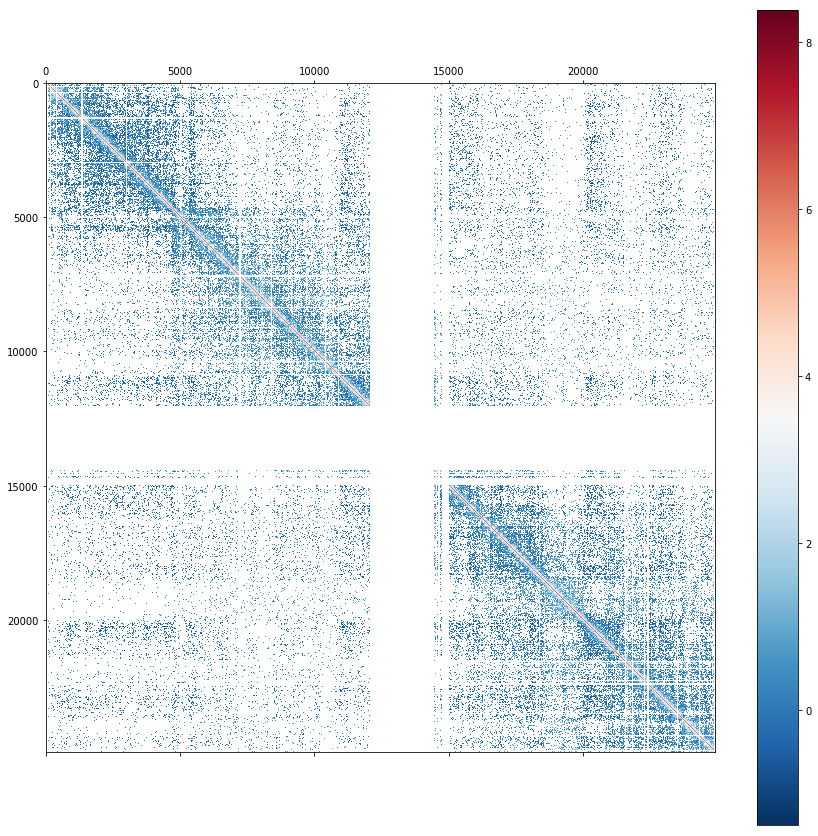

In [7]:
loops_utils.plot_HiC(np.log(arr), name = 'rao_hic_raw')

/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


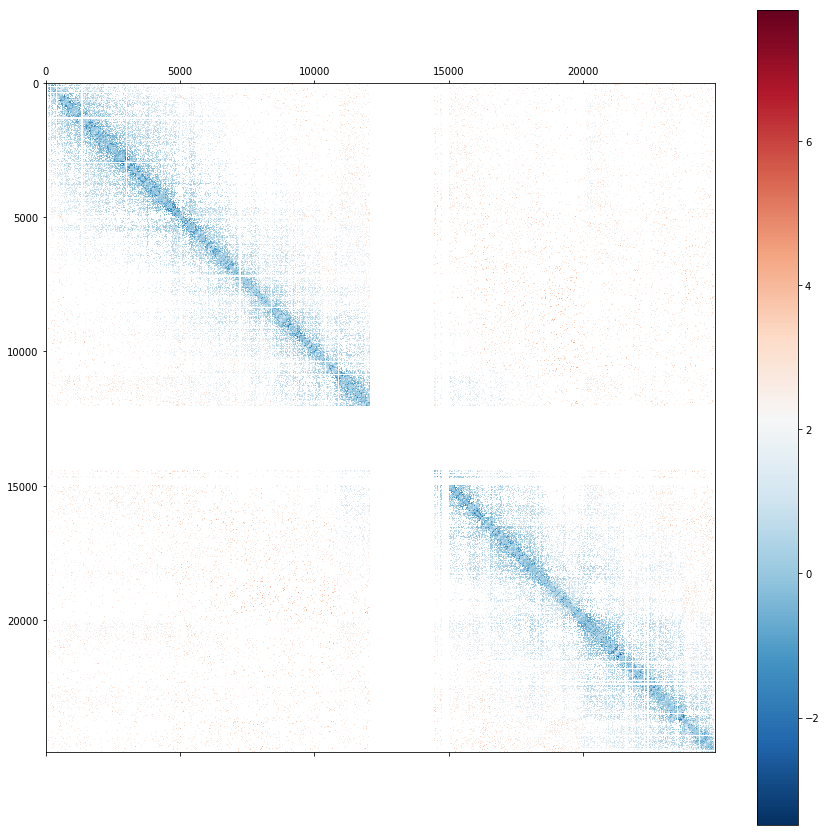

In [8]:
loops_utils.plot_HiC(np.log(arr_norm), name = 'rao_hic_norm')

Normalized map was produced by function:
It divides each diagonal of a Hi-C contact map by its' mean.  
It also does it in a smart way: it calculates averages over stripes from X to X*1.05, and divides each stripe by its mean.  
It allows to avoid divergence far from the main diagonal with a very few reads.  
(comment from __mirnylib__)

#### Loops on Hi-C

In [9]:
def plot_loops_on_hic_matrix(arr, resolution, loops_info, start = 0, end = -1):     
    '''
        plot loops with boundaries on a HiC map
    '''
    ax = loops_utils.plot_HiC(arr[start:end, start:end])

    for index, row in loops_info.iterrows():

        x1, x2, y1, y2 = row[['x1', 'x2', 'y1', 'y2']] - start - 0.5

        loop_y_centroid = row.x - start
        loop_x_centroid = row.y - start
        loop_radius = row.radius

        loop_center = (loop_x_centroid, loop_y_centroid)

        ## loop as a circle with center in @loop_center with radius @loop_radius
        loop = matplotlib.patches.Circle(loop_center, loop_radius,
                                         fill=None, alpha=1,
                                         edgecolor='lime', linewidth=2.0)
        ax.add_patch(loop)

        ## areas with start locus and end locus
        loop_tr = matplotlib.patches.Rectangle((x2, x1), y2-x2, y1-x1, 
                                               fill=None, alpha=1,
                                               edgecolor='black', linewidth=.5)
        ax.add_patch(loop_tr)
        
    plt.savefig('pictures/rao_loops_viz.png')

/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


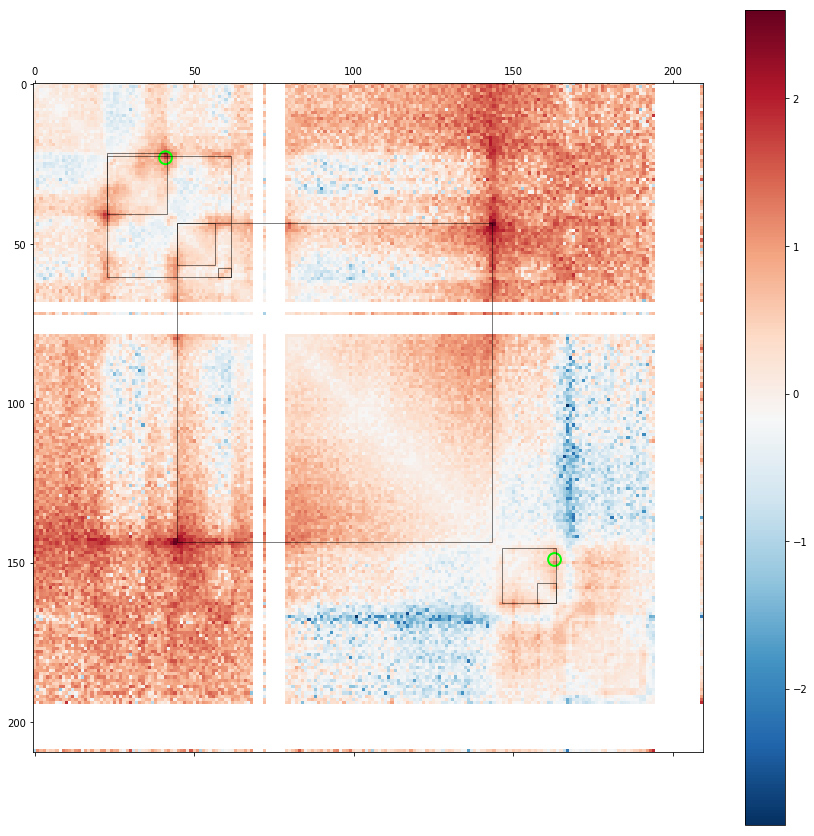

In [10]:
plot_loops_on_hic_matrix(np.log(arr_norm), resolution, loops, start = 190, end = 400)

### Average loop

In [11]:
def plot_average_loops(chr, is_norm=True):
    loops_info_chr = loops_info[loops_info.chr1 == str(chr)]
    if is_norm:
        container = LoopChromosomeContainer(np.load('arrs/10kb_chr' + str(chr) + '_norm.npy'), loops_info_chr)
        loop_avg = container.avg_loop()
        loops_utils.plot_HiC(loops_utils.z_norm_zero_middle(loop_avg), 
                             figsize=(10, 10),
                             name='average_loops/rao_norm_average_loop_chr' + str(chr), 
                             is_loop=True)
        return container, loop_avg
    else:
        container = LoopChromosomeContainer(np.load('arrs/10kb_chr' + str(chr) + '.npy'), loops_info_chr)
        loop_avg = container.avg_loop()
        loops_utils.plot_HiC(loops_utils.z_norm_zero_middle(loop_avg), 
                             figsize=(10, 10),
                             name='average_loops/rao_raw_average_loop_chr' + str(chr), 
                             is_loop=True)
        return container, loop_avg

### Normalized

###### Single loop

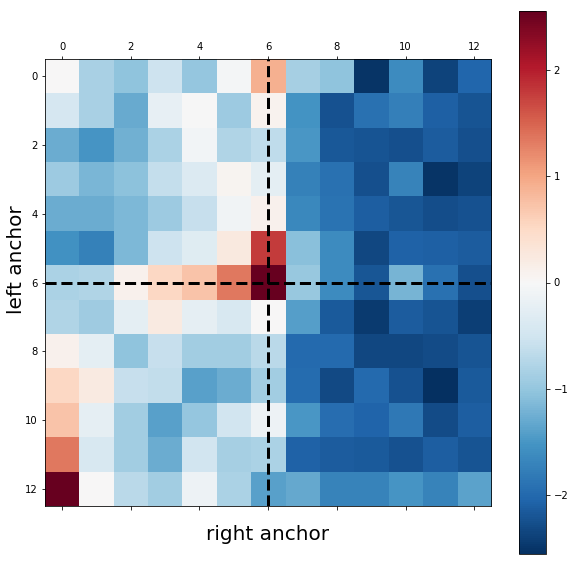

In [12]:
idx = loops.first_valid_index() + 10
container1 = LoopChromosomeContainer(arr_norm, loops)
loop_window = container1.get_loop_with_window(idx)
loops_utils.plot_HiC(loops_utils.z_norm_zero_middle(loop_window), 
                     figsize=(10,10),
                     name='average_loops/rao_norm_single_loop',
                     is_loop=True)

### Average loop

###### Chromosome 1-5, X

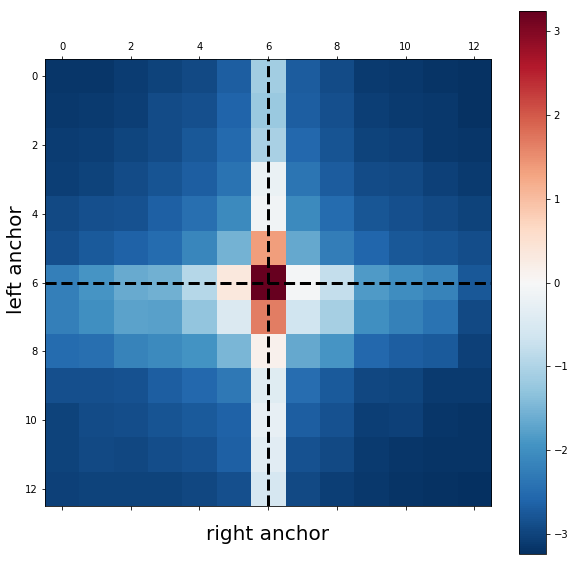

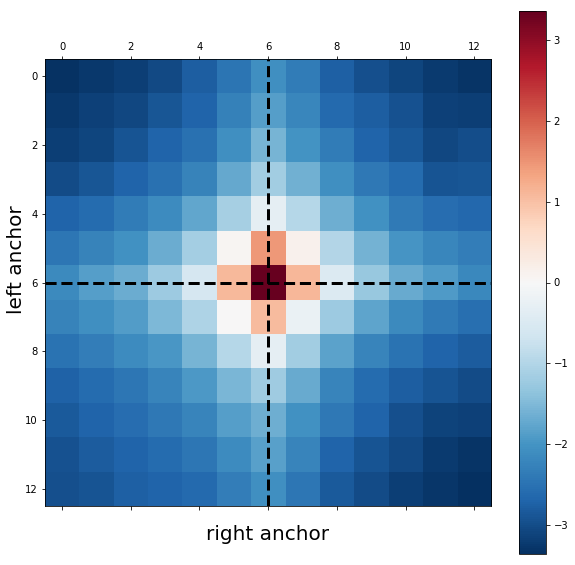

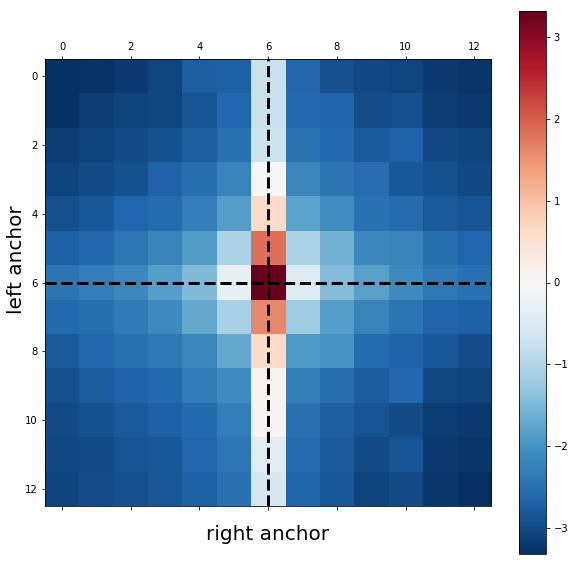

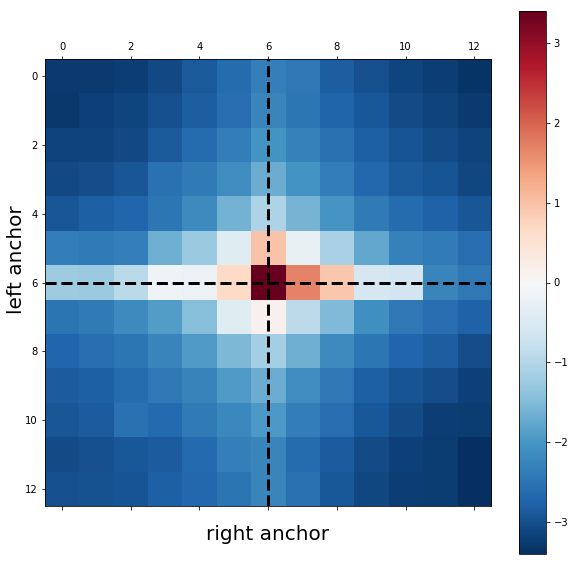

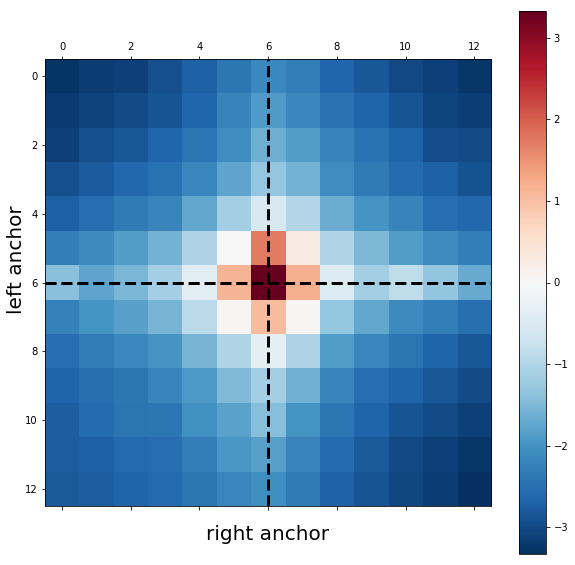

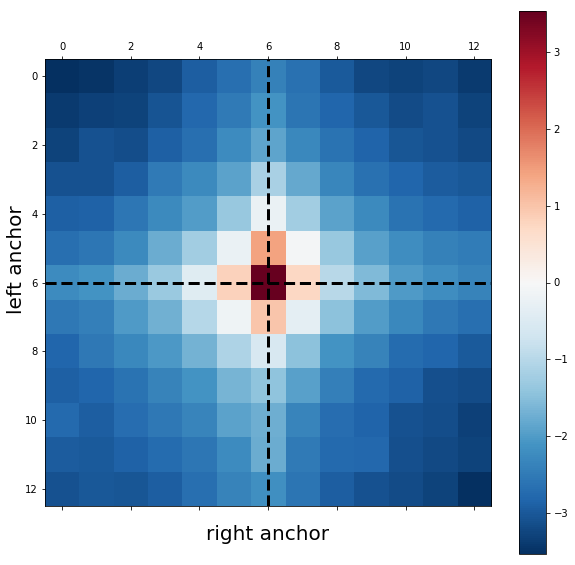

In [13]:
container1, loop_avg1 = plot_average_loops(1)
container2, loop_avg2 = plot_average_loops(2)
container3, loop_avg3 = plot_average_loops(3)
container4, loop_avg4 = plot_average_loops(4)
container5, loop_avg5 = plot_average_loops(5)
containerX, loop_avgX = plot_average_loops('X')

###### Chromosome 6-10

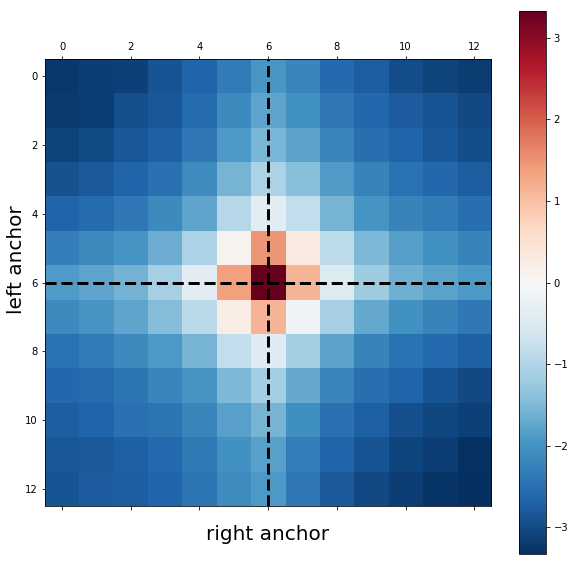

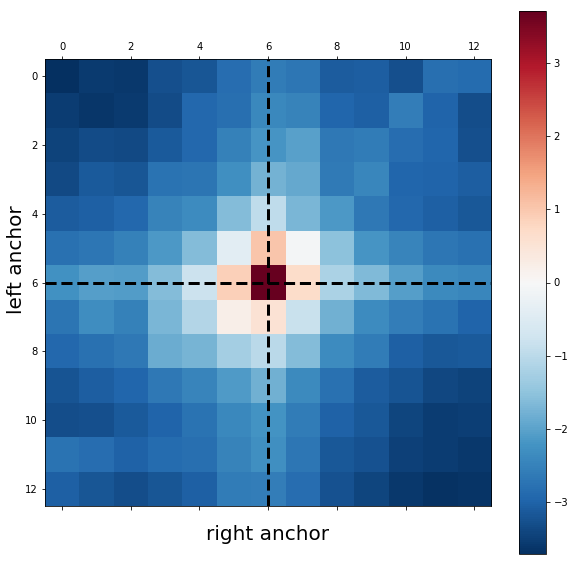

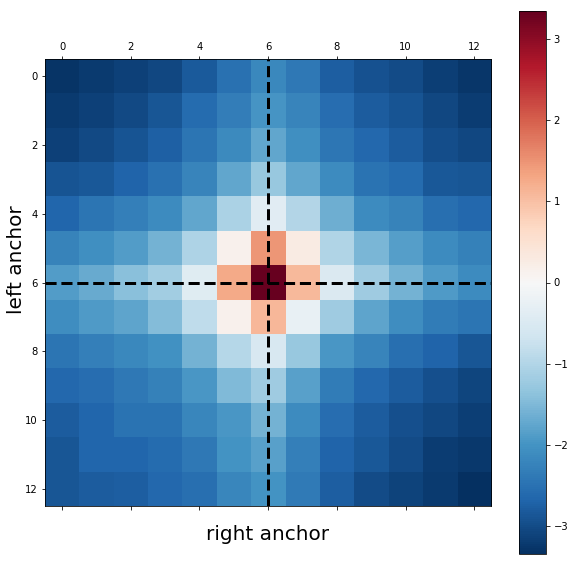

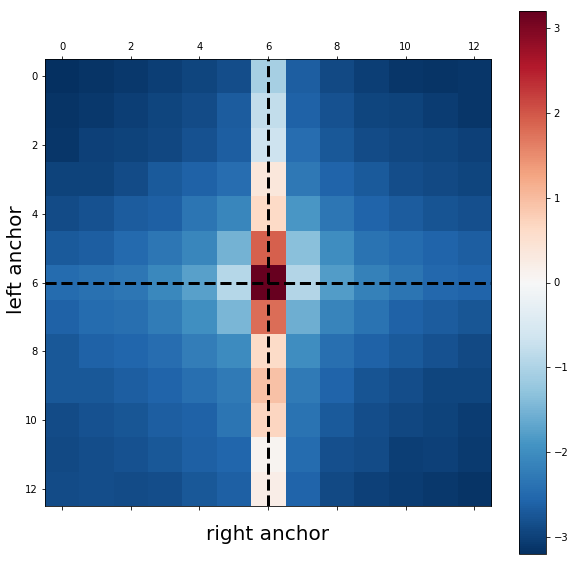

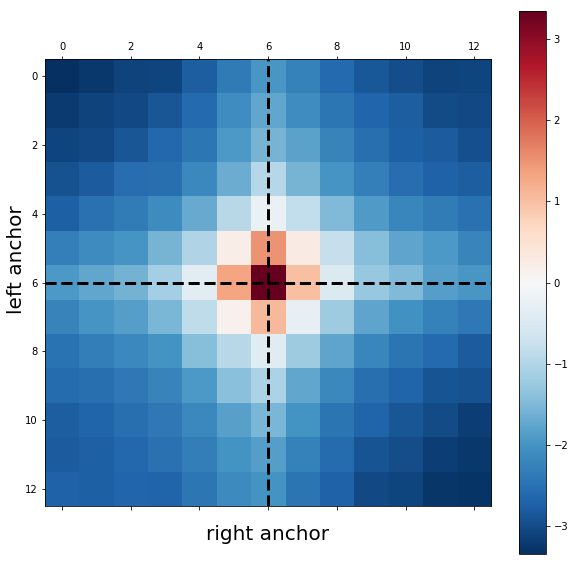

In [14]:
container6, loop_avg6 = plot_average_loops(6)
container7, loop_avg7 = plot_average_loops(7)
container8, loop_avg8 = plot_average_loops(8)
container9, loop_avg9 = plot_average_loops(9)
container10, loop_avg10 = plot_average_loops(10)

###### Chromosome 11-15

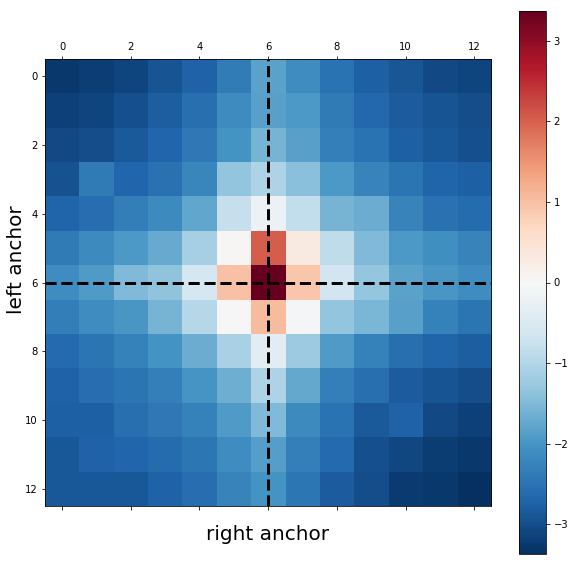

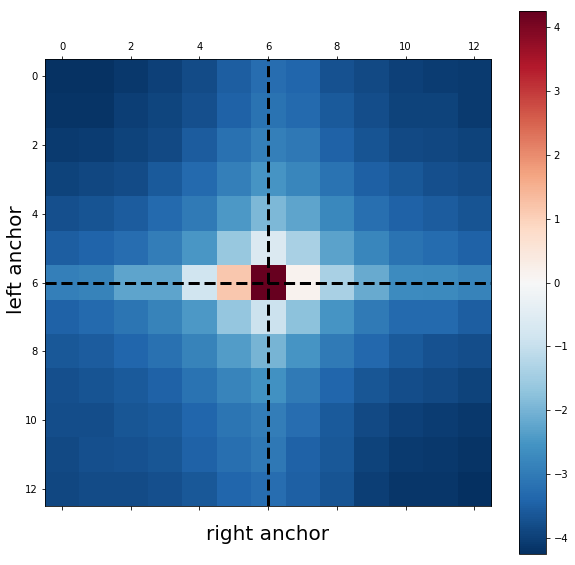

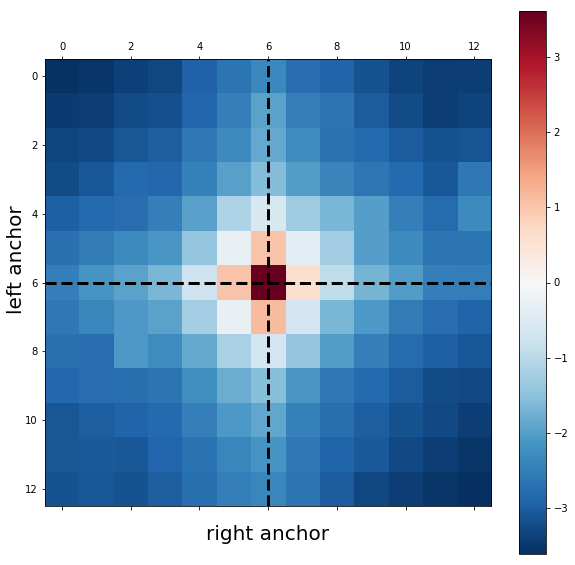

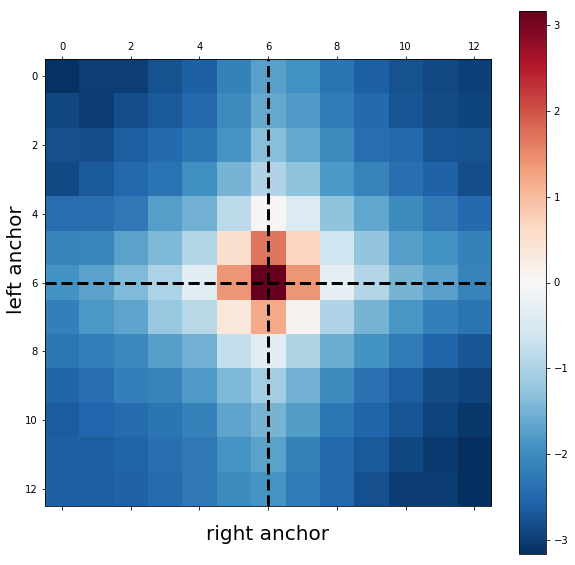

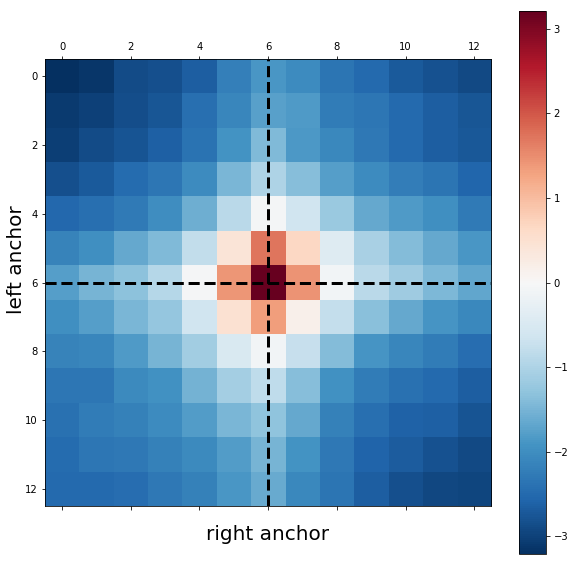

In [15]:
container11, loop_avg11 = plot_average_loops(11)
container12, loop_avg12 = plot_average_loops(12)
container13, loop_avg13 = plot_average_loops(13)
container14, loop_avg14 = plot_average_loops(14)
container15, loop_avg15 = plot_average_loops(15)

###### Chromosome 16-22

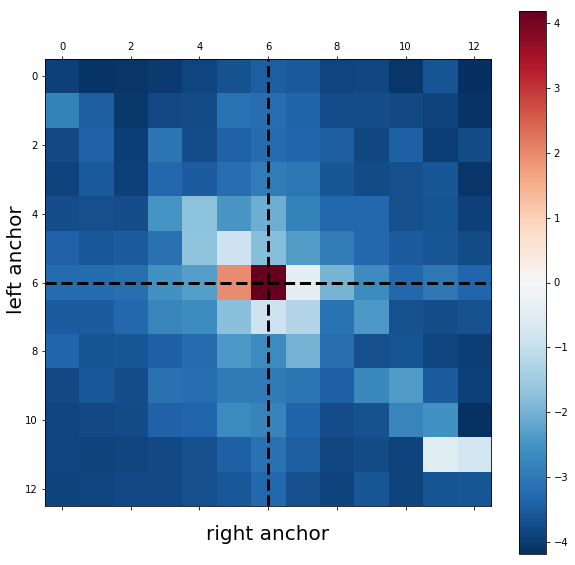

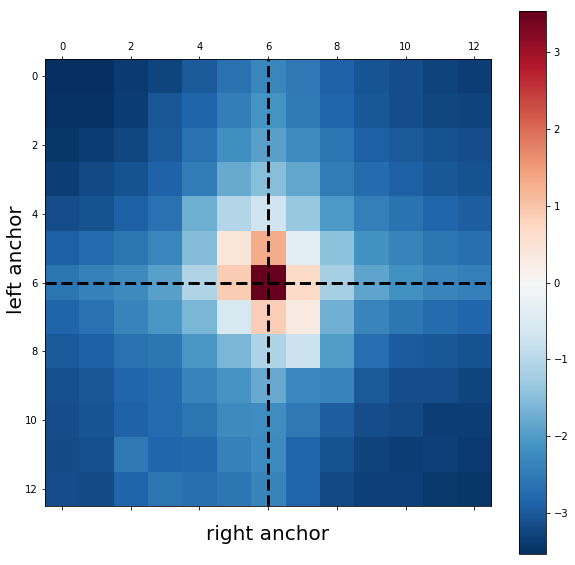

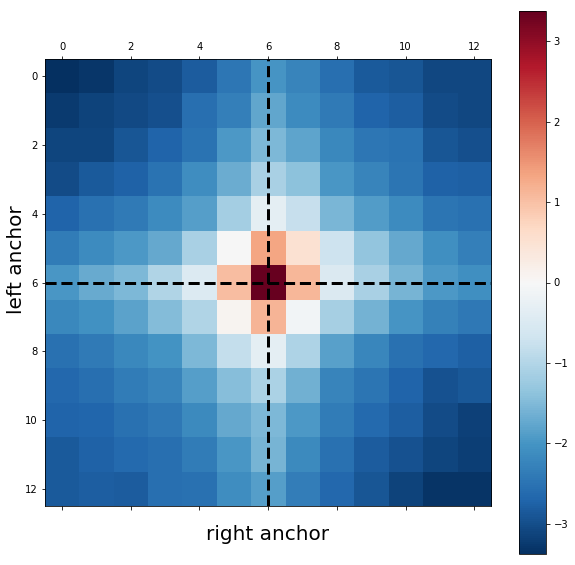

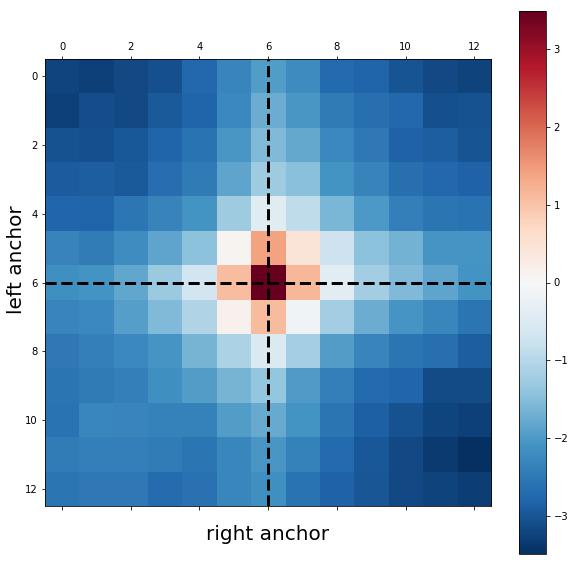

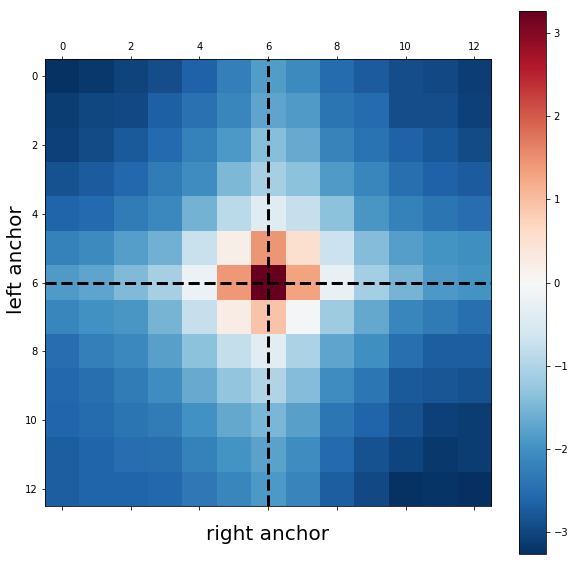

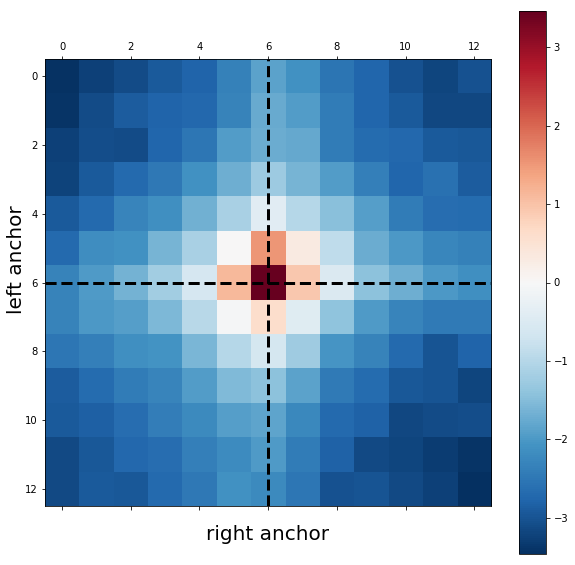

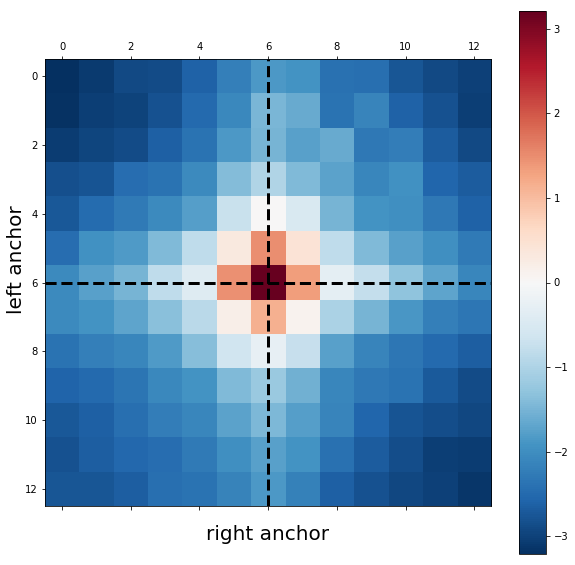

In [16]:
container16, loop_avg16 = plot_average_loops(16)
container17, loop_avg17 = plot_average_loops(17)
container18, loop_avg18 = plot_average_loops(18)
container19, loop_avg19 = plot_average_loops(19)
container20, loop_avg20 = plot_average_loops(20)
container21, loop_avg21 = plot_average_loops(21)
container22, loop_avg22 = plot_average_loops(22)

##### Overall

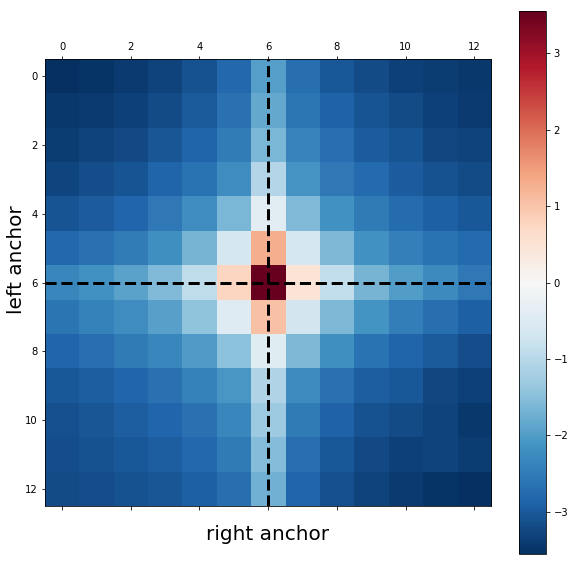

In [17]:
avg = (container1.sum_loop() + container2.sum_loop() + container3.sum_loop() + container4.sum_loop() +\
container5.sum_loop() + container6.sum_loop() + container7.sum_loop() + container8.sum_loop() +\
container9.sum_loop() + container10.sum_loop() + container11.sum_loop() + container12.sum_loop() +\
container13.sum_loop() + container14.sum_loop() + container15.sum_loop() + container16.sum_loop() +\
container17.sum_loop() + container18.sum_loop() + container19.sum_loop() + container20.sum_loop() +\
container21.sum_loop() + container22.sum_loop() + containerX.sum_loop()) / loops_info.shape[0]
loops_utils.plot_HiC(loops_utils.z_norm_zero_middle(avg), 
                     figsize=(10, 10),
                     name='average_loops/rao_norm_average_overall', 
                     is_loop=True)

### Raw data

###### Single loop

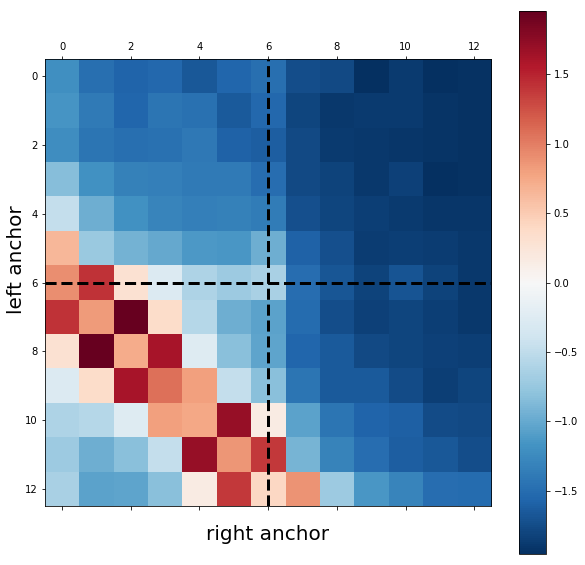

In [18]:
idx = loops.first_valid_index() + 10
container1 = LoopChromosomeContainer(arr, loops)
loop_window = container1.get_loop_with_window(idx)
loops_utils.plot_HiC(loops_utils.z_norm_zero_middle(loop_window), 
                     figsize=(10,10),
                     name='average_loops/rao_raw_single_loop',
                     is_loop=True)

###### Average loop

###### Chromosome 1-5,X

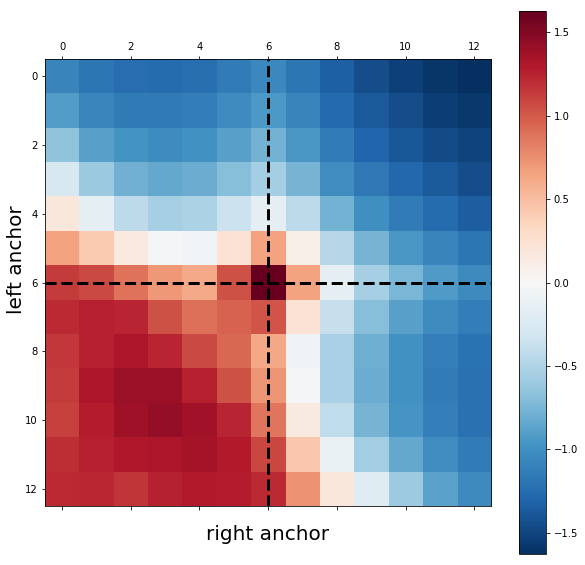

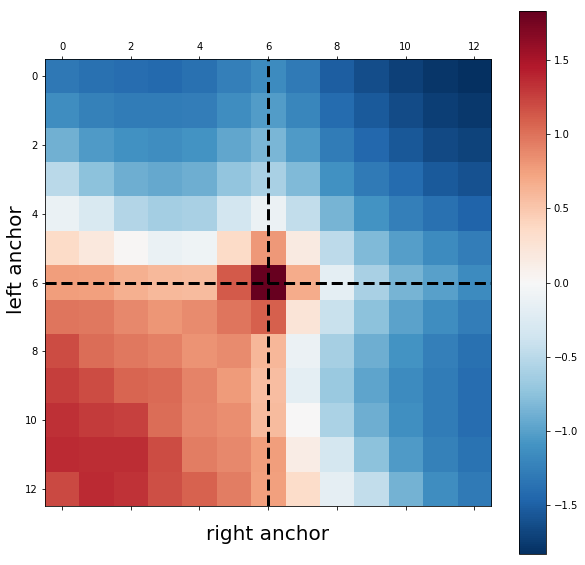

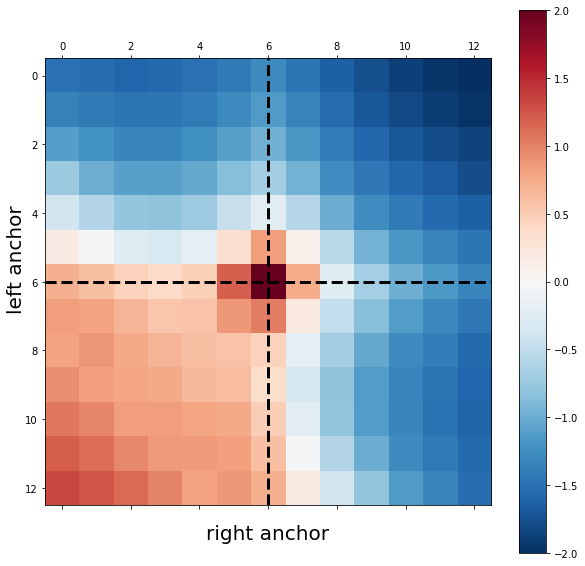

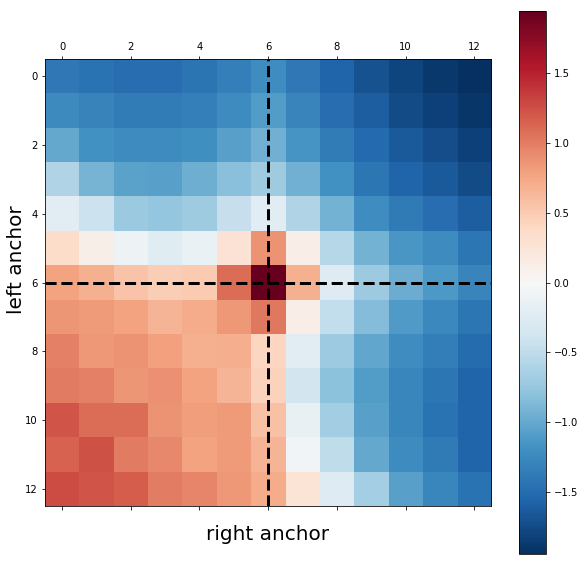

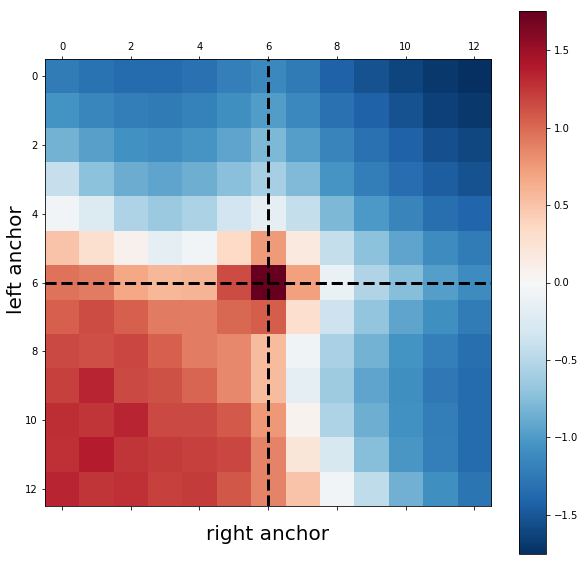

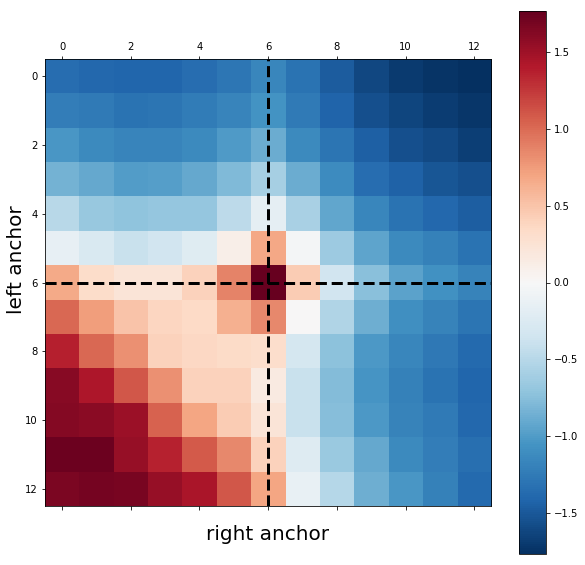

In [19]:
container1, loop_avg1 = plot_average_loops(1, False)
container2, loop_avg2 = plot_average_loops(2, False)
container3, loop_avg3 = plot_average_loops(3, False)
container4, loop_avg4 = plot_average_loops(4, False)
container5, loop_avg5 = plot_average_loops(5, False)
containerX, loop_avgX = plot_average_loops('X', False)

###### Chromosome 6-10

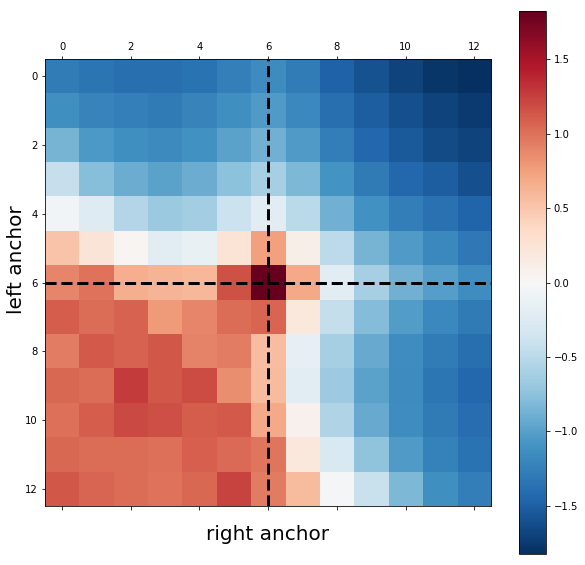

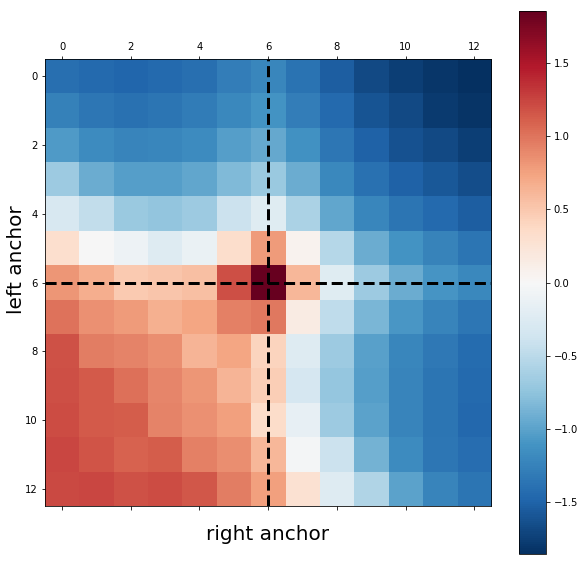

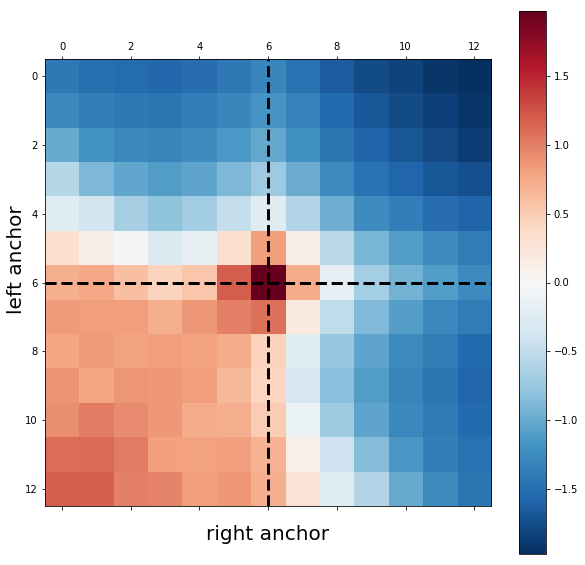

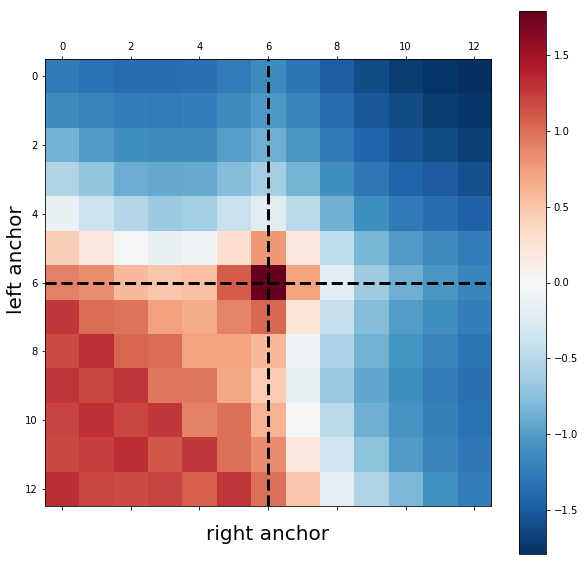

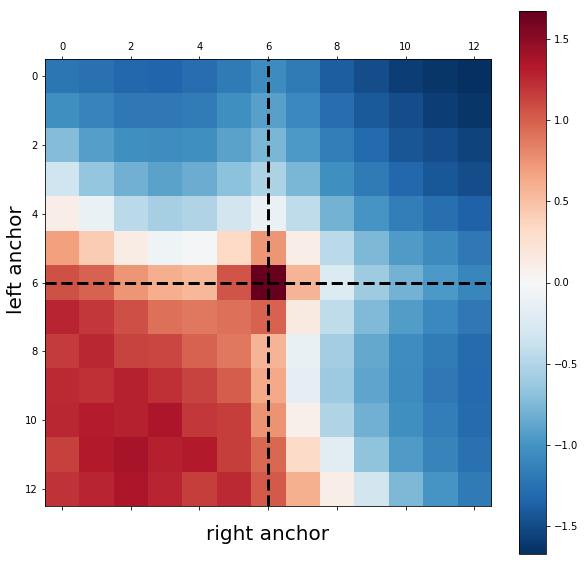

In [20]:
container6, loop_avg6 = plot_average_loops(6, False)
container7, loop_avg7 = plot_average_loops(7, False)
container8, loop_avg8 = plot_average_loops(8, False)
container9, loop_avg9 = plot_average_loops(9, False)
container10, loop_avg10 = plot_average_loops(10, False)

###### Chromosome 11-15

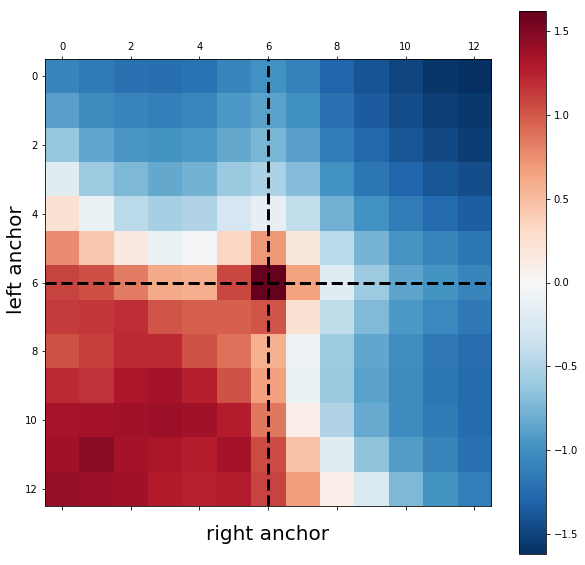

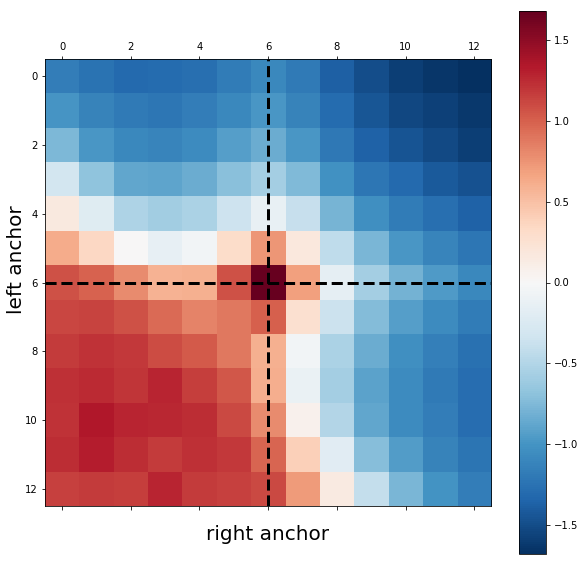

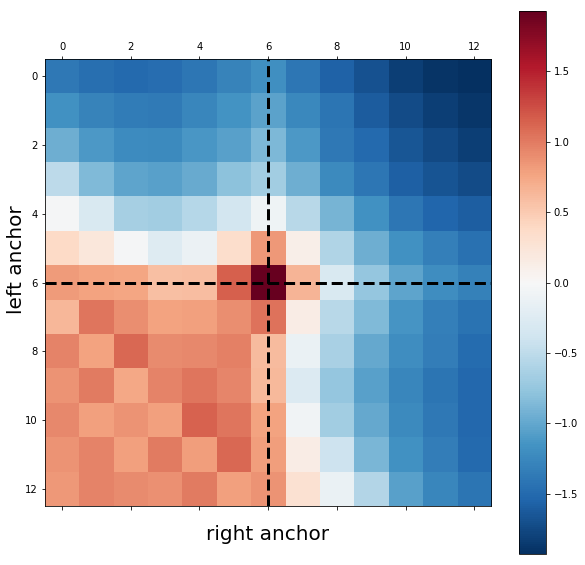

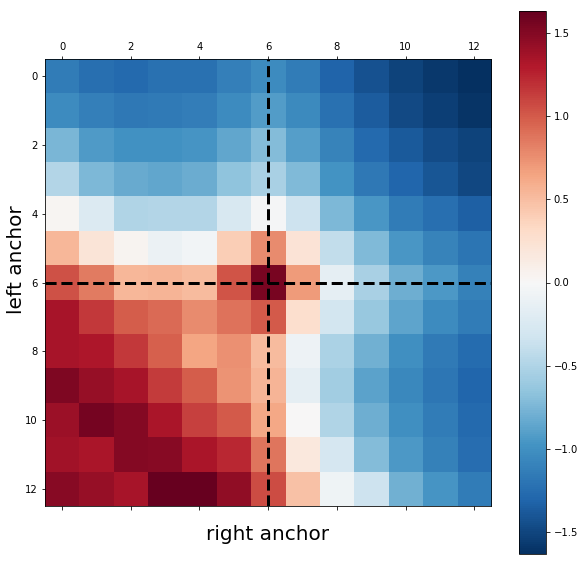

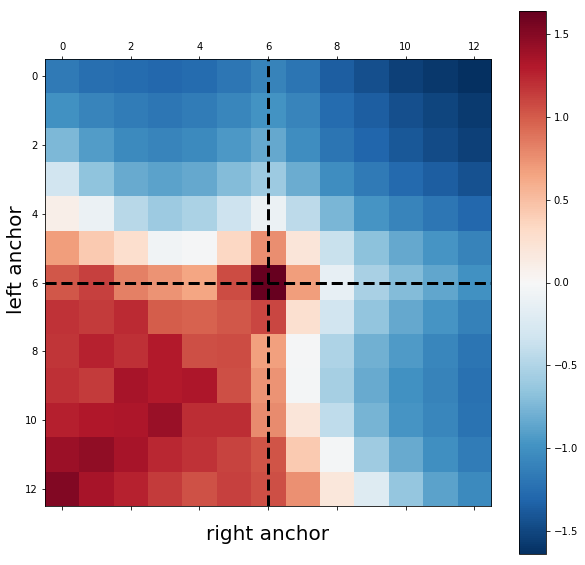

In [21]:
container11, loop_avg11 = plot_average_loops(11, False)
container12, loop_avg12 = plot_average_loops(12, False)
container13, loop_avg13 = plot_average_loops(13, False)
container14, loop_avg14 = plot_average_loops(14, False)
container15, loop_avg15 = plot_average_loops(15, False)

###### Chromosome 16-22

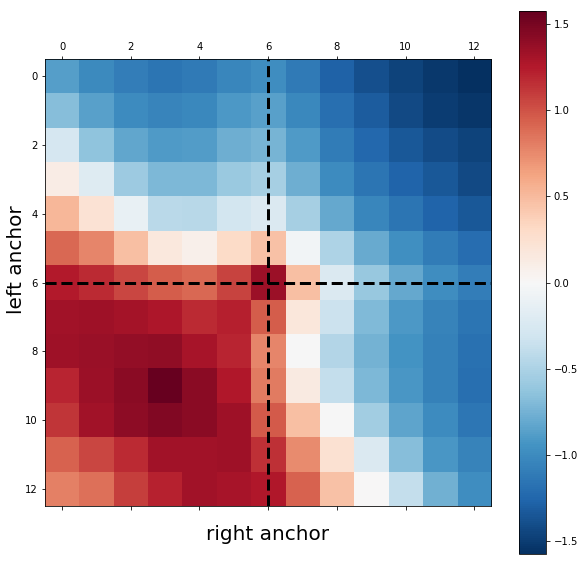

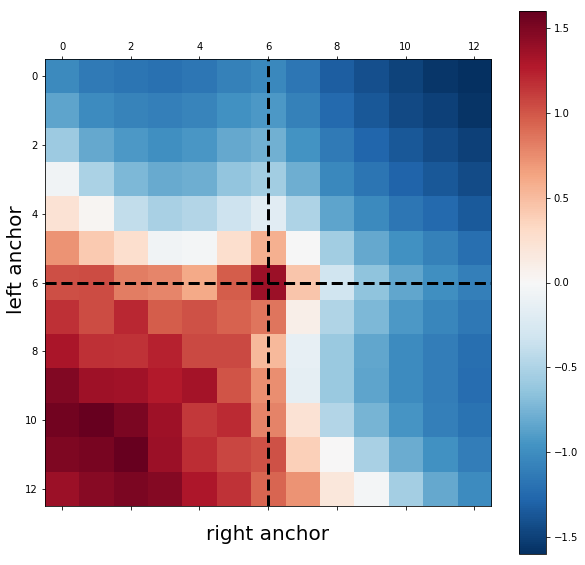

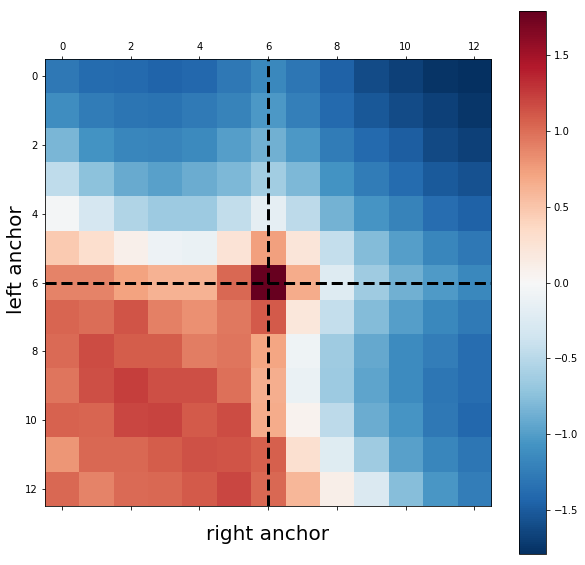

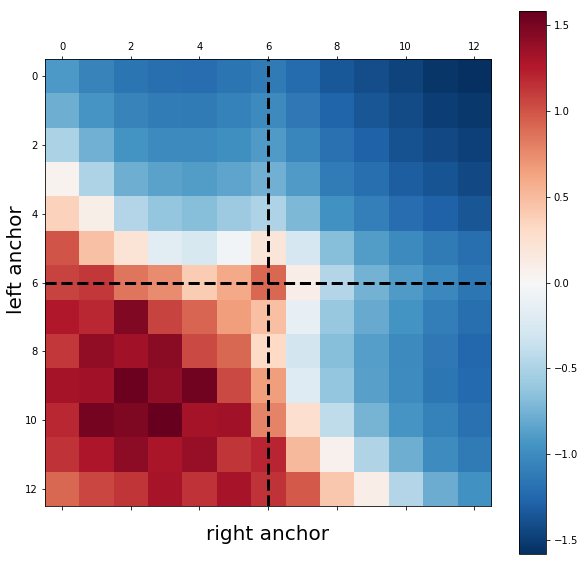

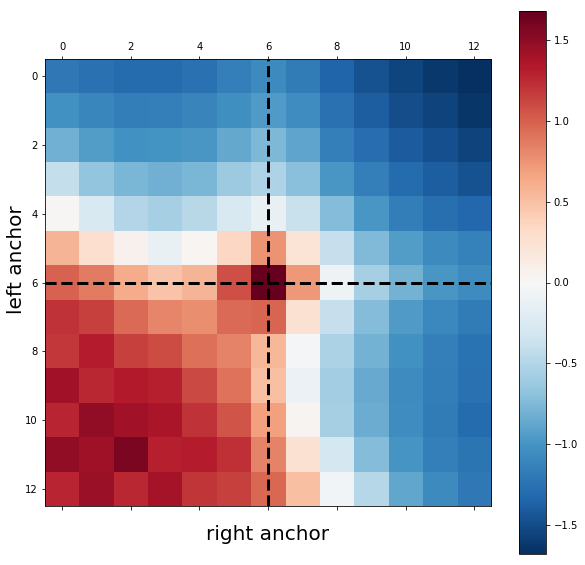

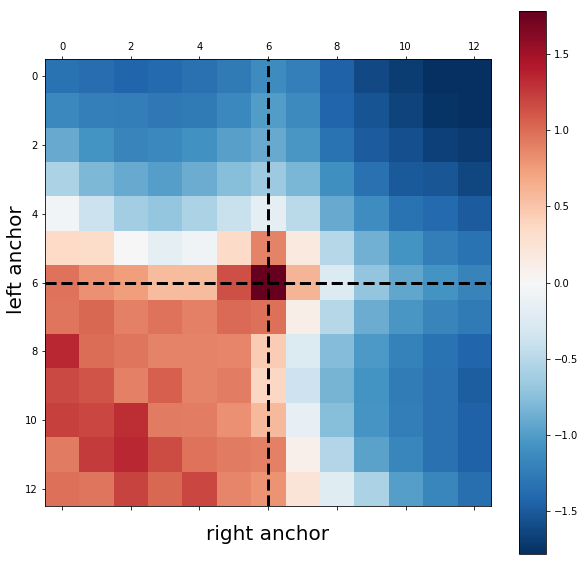

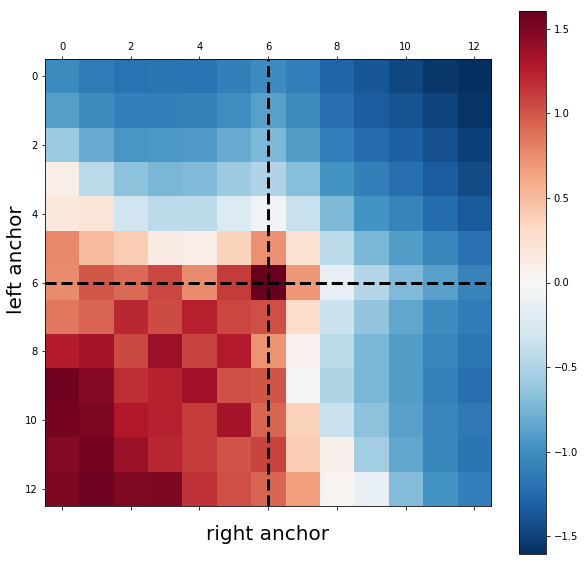

In [22]:
container16, loop_avg16 = plot_average_loops(16, False)
container17, loop_avg17 = plot_average_loops(17, False)
container18, loop_avg18 = plot_average_loops(18, False)
container19, loop_avg19 = plot_average_loops(19, False)
container20, loop_avg20 = plot_average_loops(20, False)
container21, loop_avg21 = plot_average_loops(21, False)
container22, loop_avg22 = plot_average_loops(22, False)

###### Overall

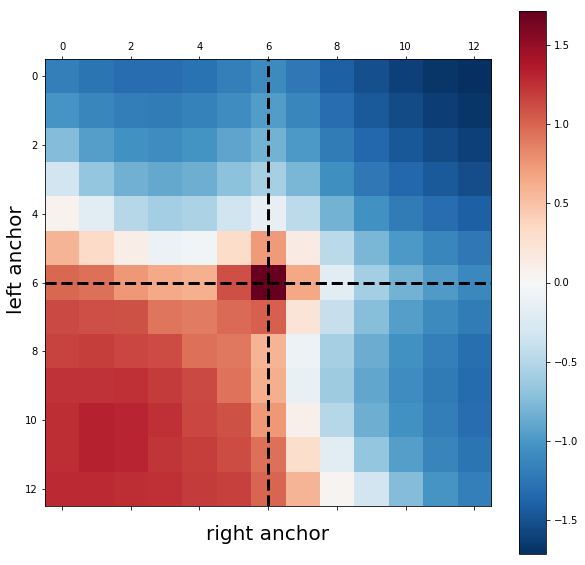

In [23]:
avg = (container1.sum_loop() + container2.sum_loop() + container3.sum_loop() + container4.sum_loop() +\
container5.sum_loop() + container6.sum_loop() + container7.sum_loop() + container8.sum_loop() +\
container9.sum_loop() + container10.sum_loop() + container11.sum_loop() + container12.sum_loop() +\
container13.sum_loop() + container14.sum_loop() + container15.sum_loop() + container16.sum_loop() +\
container17.sum_loop() + container18.sum_loop() + container19.sum_loop() + container20.sum_loop() +\
container21.sum_loop() + container22.sum_loop() + containerX.sum_loop()) / loops_info.shape[0]
loops_utils.plot_HiC(loops_utils.z_norm_zero_middle(avg), 
                     figsize=(10, 10),
                     name='average_loops/rao_norm_average_overall', 
                     is_loop=True)